# Correlation coefficient

In [63]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

sys.path.append(os.path.join(os.path.abspath(''), '..'))

import constants

In [25]:
train = pd.read_csv(constants.TRAIN)
test = pd.read_csv(constants.TEST)

In [26]:
train

,Unnamed: 0,idx,mean,count,vert_symmetry,hor_symmetry,vert_mass_center,hor_mass_center,vert_viola,hor_viola,all_viola,label
0,0,12628,26.538265,122,10.081633,-18.117347,14.299144,14.299385,-32.581633,-42.862245,19.836735,7
1,1,37730,40.753827,155,-2.125000,-11.864796,13.984069,14.207067,-23.267857,-77.915816,0.829082,3
2,2,39991,41.187500,176,0.323980,-4.267857,14.086804,13.838004,-35.079082,-76.956633,-24.625000,8
3,3,8525,38.184949,155,-2.043367,-2.477041,14.146140,13.564352,-48.140306,-76.369898,-13.706633,9
4,4,8279,48.011480,204,-6.772959,-21.385204,13.838341,14.332457,-21.022959,-74.385204,-24.446429,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,24023,49.288265,179,-12.688776,1.612245,13.566016,13.769448,-68.637755,-88.158163,2.275510,6
996,996,25697,15.947704,60,-0.640306,-19.854592,13.589698,14.413421,-14.966837,-31.895408,-10.094388,1
997,997,34049,35.149235,164,-10.558673,-9.573980,13.835577,14.277933,-48.966837,-67.589286,-20.778061,6
998,998,43215,48.392857,203,-0.750000,-10.158163,14.135240,14.335635,-50.530612,-78.086735,-36.336735,8


In [60]:
x_feature = 'mean'
y_feature = 'count'

In [61]:
X_train = train[x_feature].values
X_test = test[x_feature].values
Y_train = train[y_feature].values
Y_test = test[y_feature].values

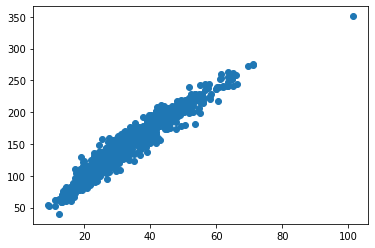

In [62]:
plt.plot(X_train, Y_train, 'o')
plt.show()

In [65]:
model = LinearRegression()
model.fit(X_train.reshape(-1, 1), Y_train.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
model.coef_

array([[3.5836792]])

In [76]:
x_mean = np.mean(X_train)
y_mean = np.mean(Y_train)
cov = np.sum((X_train - x_mean) * (Y_train - y_mean))
x_var = np.sum((X_train - x_mean) ** 2)
y_var = np.sum((Y_train - y_mean) ** 2)
cor = cov / np.sqrt(x_var * y_var)
print('correlation coefficient:', cor)

correlation coefficient: 0.9630931048114645


In [102]:
y_mean = np.mean(Y_test)
y_var = np.sum((Y_test - y_mean) ** 2)
pred_y = model.predict(X_test.reshape(-1, 1)).reshape(-1)
pred_var = np.sum((pred_y - Y_test) ** 2)
det = 1 - pred_var / y_var
print('determinacy coefficient:', det)

determinacy coefficient: 0.9234620267287004
